In [29]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import ndimage
import mpmath as mat

In [30]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [31]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Lucida Bright'

In [32]:
surge_tide = 0.9704831 + 2.247370297

In [33]:
work_dir = r'C:/Users/ianmu/OneDrive - Imperial College London/Thesis Data/SURFZONE DSM/'
file_names ='SurfZone_DEM_2014_South_TQ60ne.tif',\
            'SurfZone_DEM_2014_South_TQ60se.tif',\
            'SurfZone_DEM_2014_South_TQ60sw.tif',\
            'SurfZone_DEM_2014_South_TV59ne.tif',\
            'SurfZone_DEM_2014_South_TV59se.tif',\
            'SurfZone_DEM_2014_South_TV69nw.tif',\
            'SurfZone_DEM_2014_South_TV69sw.tif'

ds_list = []
band_list = []
for i in range(len(file_names)):
    ds_list.append(rasterio.open(work_dir+file_names[i]))
    band_list.append(ds_list[i].read(1))

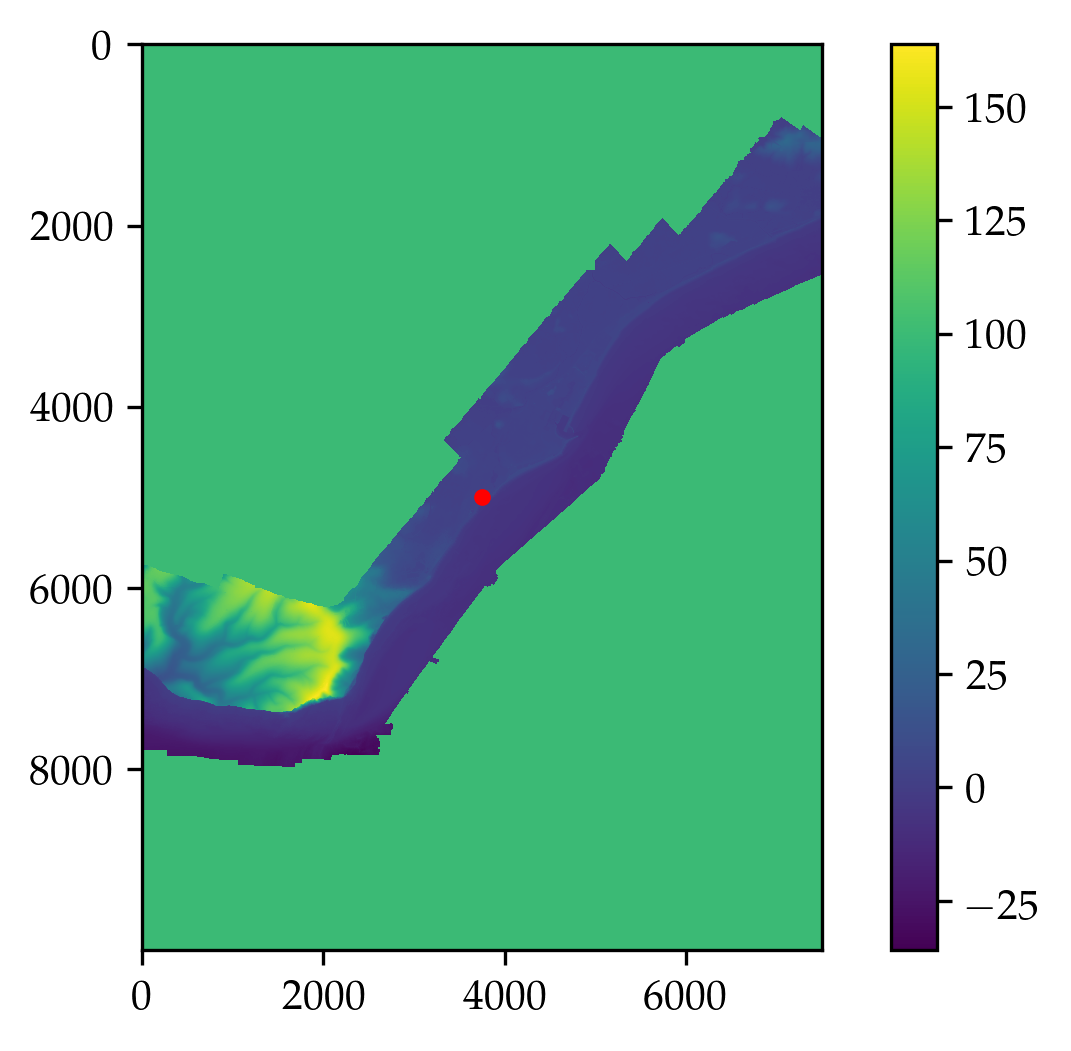

In [34]:
replace_val = 99.9999

dx = len(band_list[0][0])
dy = len(band_list[0])

bot = np.ones([dy*4,dx*3]) * replace_val

bounds =[0, 1, 2, 3],\
        [1, 2, 2, 3],\
        [1, 2, 1, 2],\
        [2, 3, 0, 1],\
        [3, 4, 0, 1],\
        [2, 3, 1, 2],\
        [3, 4, 1, 2]

for i in range(len(file_names)):
    band_list[i][band_list[i]>1e10] = replace_val
    bot[bounds[i][0]*dy:bounds[i][1]*dy,bounds[i][2]*dx:bounds[i][3]*dx] = band_list[i]

plt.imshow(bot)
plt.colorbar()

plt.plot(len(bot[0])/2,len(bot)/2,'r.')
np.savetxt('full_high_res.bot',bot)

## 2D bathymetry

In [7]:
x_centre_nat = (ds_list[2].bounds[0] + ds_list[2].bounds[2])/2 
y_centre_nat = ds_list[2].bounds[1]
x_centre_lat = 50.7768131216
x_centre_lon = 0.3034973120

dom_dis =np.array([[ -144.13194444, -2623.01697531],
       [-1653.55110489, -1310.89891733],
       [ 3792.2222295 ,  1905.24050603],
       [ 2282.80306905,  3217.35856401]])

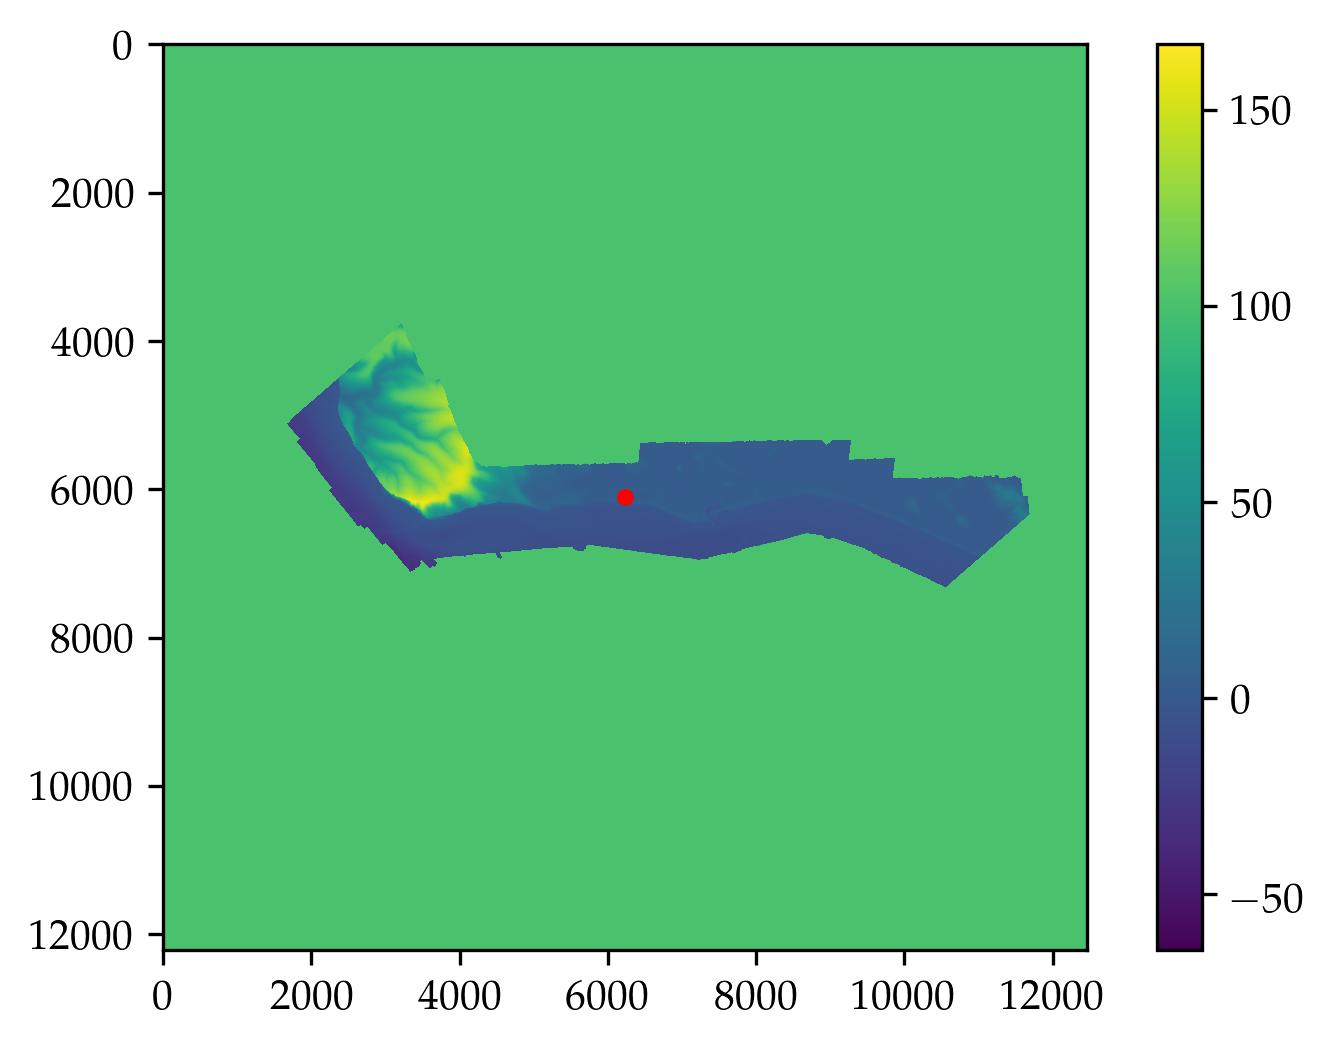

In [8]:
bot_rot = ndimage.rotate(bot, -49, cval=replace_val)
plt.imshow(bot_rot)
plt.colorbar()
plt.plot(len(bot_rot[0])/2,len(bot_rot)/2,'r.')

In [9]:
from rasterio.transform import from_origin

arr = np.random.randint(5, size=(100,100)).astype(np.float)

transform = from_origin(x_centre_nat-len(bot[0])/2, y_centre_nat+len(bot)/2, len(bot[0])/100, len(bot)/100)

new_dataset = rasterio.open('test1.tif', 'w', driver='GTiff',
                            height = bot.shape[0], width = bot.shape[1],
                            count=1, dtype=str(bot.dtype),
                            crs='+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs',
                            transform=transform)

new_dataset.write(bot, 1)
new_dataset.close()

In [10]:
# center = np.array([len(bot_rot)/2, len(bot_rot[0])/2])

# L = 8000/2
# B = 1000/2

# r1 = sum(dom_dis[0]**2)**0.5 /2
# r2 = sum(dom_dis[2]**2)**0.5 /2

# angle_2 = np.arccos((-r1**2 + r2**2 + L**2) / (2 * r2 * L))
# angle_1 = np.arccos((L - r2*np.cos(angle_2))/r1)

# co_dl = np.array([- np.cos(angle_1)*r1, np.sin(angle_1)*r1]) + center
# co_dr = np.array([np.cos(angle_2)*r2, np.sin(angle_2)*r2]) + center

# co_ul = co_dl + np.array([0,-B])
# co_ur = co_dr + np.array([0,-B])

# bot_rot[np.isclose(bot_rot, replace_val, 1e-4)] = np.nan

# co_dl[0] -= 500
# co_dr[0] -= 500
# co_ul[0] -= 500
# co_ur[0] -= 500

# plt.imshow(bot_rot)
# plt.plot(center[0],center[1],'.')
# plt.plot(co_dl[0],co_dl[1],'.')
# plt.plot(co_dr[0],co_dr[1],'.')
# plt.plot(co_ul[0],co_ul[1],'.')
# plt.plot(co_ur[0],co_ur[1],'.')

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


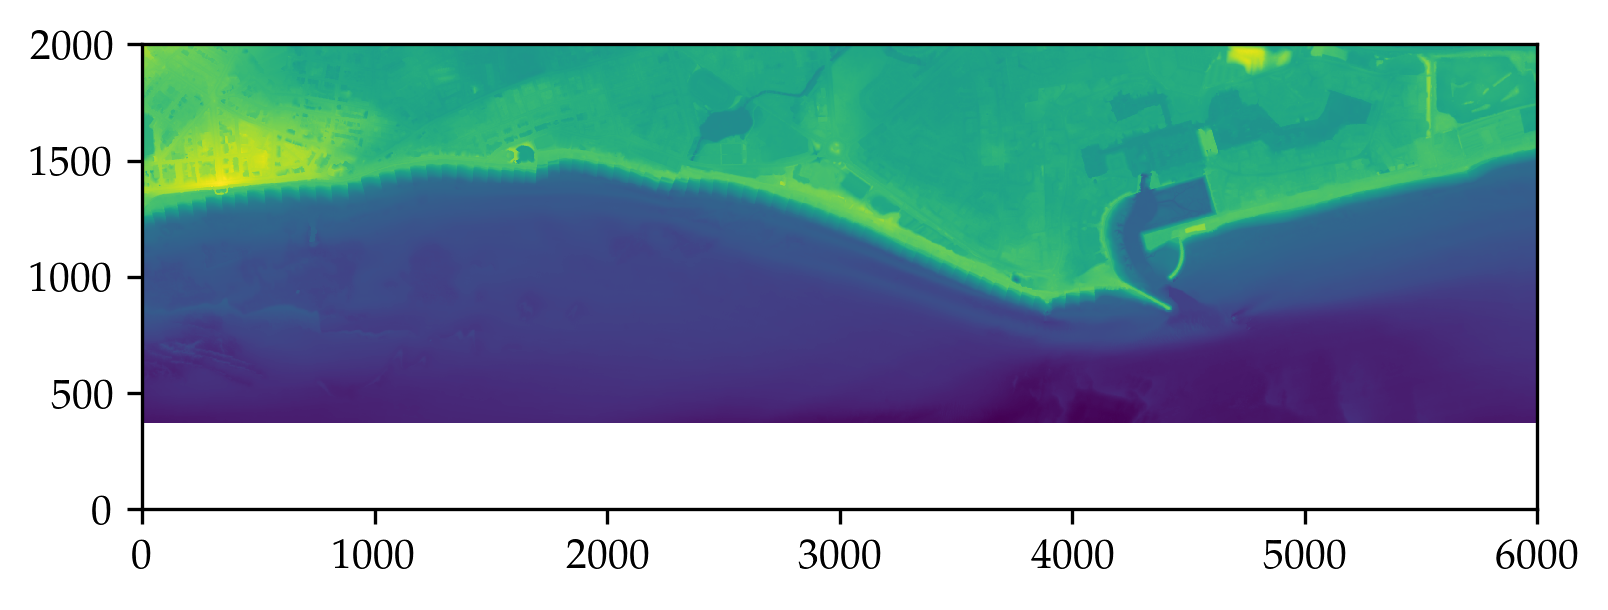

In [11]:
bot_rot[np.isclose(bot_rot, replace_val, 1e-4)] = np.nan
center = np.array([len(bot_rot)/2, len(bot_rot[0])/2])

cutoff = 815
L = 6000/2
B = 2000/2

r1 = sum(dom_dis[0]**2)**0.5 /2
r2 = sum(dom_dis[2]**2)**0.5 /2

angle_2 = np.arccos((-r1**2 + r2**2 + L**2) / (2 * r2 * L))
angle_1 = np.arccos((L - r2*np.cos(angle_2))/r1)

co_dl = np.array([- np.cos(angle_1)*r1, np.sin(angle_1)*r1]) + center
co_dr = np.array([np.cos(angle_2)*r2, np.sin(angle_2)*r2]) + center

co_ul = co_dl + np.array([0,-B])
co_ur = co_dr + np.array([0,-B])

co_dl += 150, -140
co_dr += 150, -140
co_ul += 150, -140
co_ur += 150, -140

SWASH_bot = bot_rot[int(round(co_ul[1])):int(round(co_dl[1])),int(round(co_ul[0])):int(round(co_ur[0]))]
SWASH_bot[int(len(SWASH_bot)/2):][SWASH_bot[int(len(SWASH_bot)/2):]>50] = np.nan
SWASH_bot[cutoff:] = np.nan
                        
plt.imshow(SWASH_bot,extent = [0,L*2,0,B*2])

### Coarse bathymetry

In [12]:
work_path = "../../SWAN/Output/"
project_name = "Eastbourne_01"


head = (pd.read_csv(work_path+project_name+"/"+project_name+"_f2.tab",sep='\s+',skiprows=4)).columns[1:]
df = pd.read_csv(work_path+project_name+"/"+project_name+"_f2.tab",sep='\s+',skiprows=7, names= head)

x = np.array(df.Xp,dtype=float)
y = np.array(df.Yp,dtype=float)
Hs = np.array(df.Hsig,dtype=float)
d = np.array(df.Depth,dtype=float)
lam = np.array(df.Wlen,dtype=float)

C:\Users\ianmu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
leny = 2999 + 1
lenx = 999 + 1

Hs_ = np.zeros([int(lenx), int(leny)])
d_ = np.zeros([int(lenx), int(leny)])
lam_ = np.zeros([int(lenx), int(leny)])

for i in range(int(lenx)):
    Hs_[len(Hs_) -1 - i] = Hs[int(leny*i):int(leny*(i+1))]
    d_[len(d_) -1 - i] = d[int(leny*i):int(leny*(i+1))]
    lam_[len(lam_) -1 - i] = lam[int(leny*i):int(leny*(i+1))]

d_[d_==-99] = np.nan

Text(0.5, 1.0, 'SWASH bottom boundary input')

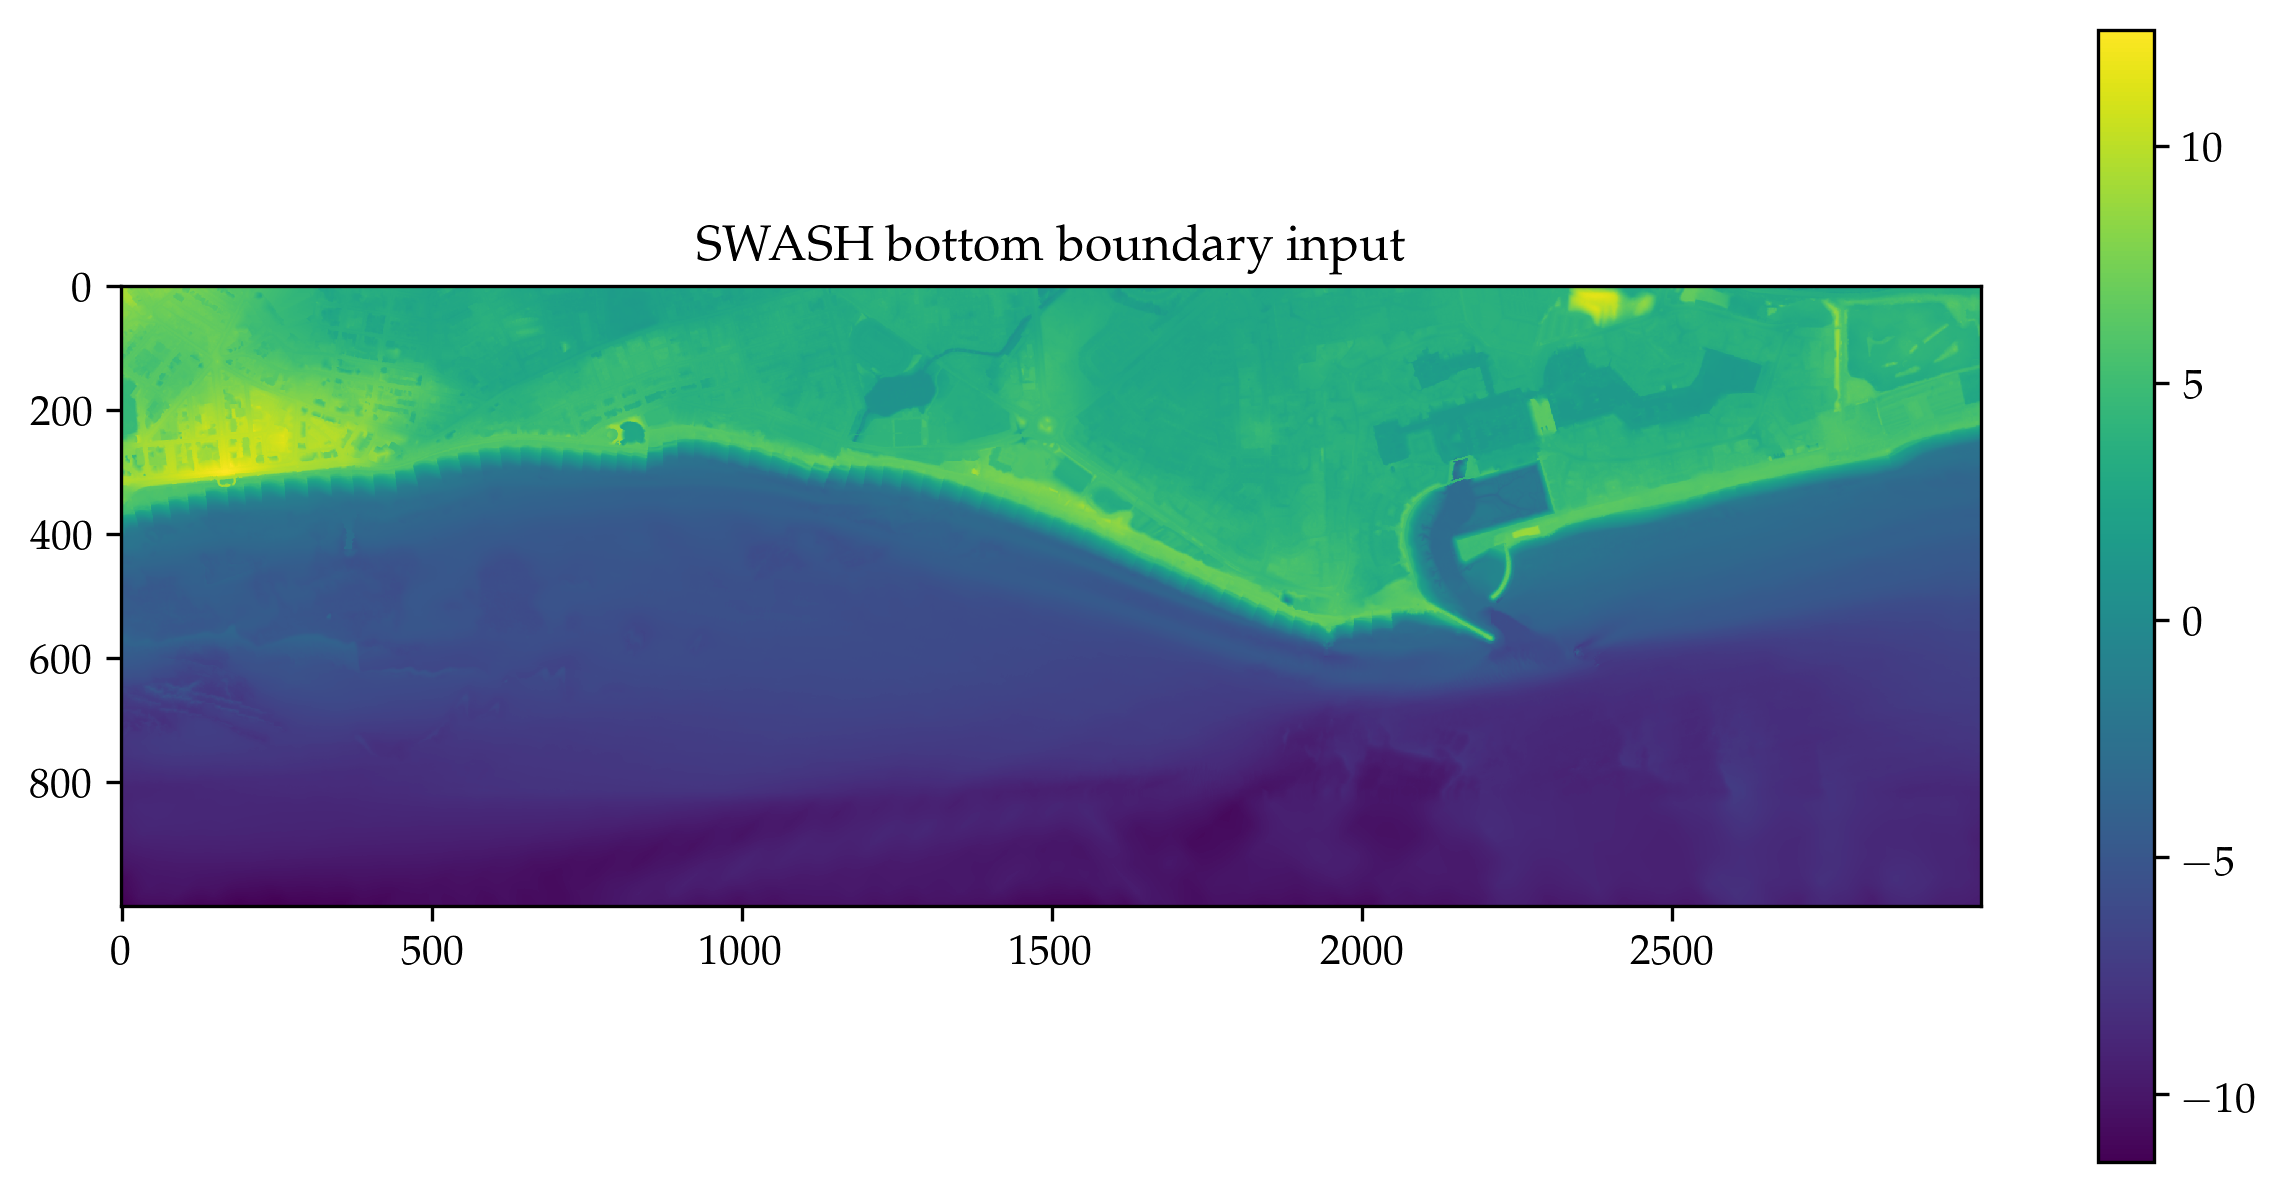

In [14]:
SWASH_bot2 = SWASH_bot
new = np.isnan(SWASH_bot2)
SWASH_bot2[new] = -d_[new] #-2.583

diff = SWASH_bot2[cutoff]-SWASH_bot2[cutoff-1]
diff2 = SWASH_bot2[cutoff]-SWASH_bot2[cutoff-1]
SWASH_bot2[new] -= np.mean(diff)
diff = SWASH_bot2[cutoff]-SWASH_bot2[cutoff-1]

r = 20
for i in range(r):
    SWASH_bot2[cutoff + i] -= (diff*(r - i) + np.mean(diff)*(i))/r
# #wl[cutoff + i + 1:] -= np.mean(diff)

for i in range(10):
    SWASH_bot2[316-i,2137 + int((2170 - 2146)/7 * (i)):2137+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2
    SWASH_bot2[316-i,2138 + int((2170 - 2146)/7 * (i)):2138+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2
    SWASH_bot2[316-i,2139 + int((2170 - 2146)/7 * (i)):2139+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2+0.0001
    SWASH_bot2[316-i,2140 + int((2170 - 2146)/7 * (i)):2140+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2+0.0001
    SWASH_bot2[316-i,2141 + int((2170 - 2146)/7 * (i)):2141+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2+0.0001
    SWASH_bot2[316-i,2142 + int((2170 - 2146)/7 * (i)):2142+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2+0.0001
    SWASH_bot2[316-i,2143 + int((2170 - 2146)/7 * (i)):2143+int((2170 - 2146)/7 * (i+1))+4] = (SWASH_bot2[317,2146] + SWASH_bot2[311,2170])/2

for i in range(6):
    SWASH_bot2[281-i,2145 + int((2170 - 2146)/6 * (i)):2145+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2
    SWASH_bot2[281-i,2146 + int((2170 - 2146)/6 * (i)):2146+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2
    SWASH_bot2[281-i,2147 + int((2170 - 2146)/6 * (i)):2147+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2
    SWASH_bot2[281-i,2148 + int((2170 - 2146)/6 * (i)):2148+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2

    SWASH_bot2[280-i,2146 + int((2170 - 2146)/6 * (i)):2146+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2
    SWASH_bot2[282-i,2147 + int((2170 - 2146)/6 * (i)):2147+int((2170 - 2146)/6 * (i+1))] = (SWASH_bot2[281,2146] + SWASH_bot2[276,2170])/2


# SWASH_bot2[cutoff] = (SWASH_bot2[cutoff-1] + SWASH_bot2[cutoff+1] + SWASH_bot2[cutoff])/3
# SWASH_bot2[cutoff-1] = (SWASH_bot2[cutoff-2] + SWASH_bot2[cutoff] + SWASH_bot2[cutoff-1])/3
# SWASH_bot2[cutoff+1] = (SWASH_bot2[cutoff+2] + SWASH_bot2[cutoff] + SWASH_bot2[cutoff+1])/3

plt.figure(figsize=[10,5])
plt.imshow(SWASH_bot2)#,extent = [0,L*2,0,B*2])
plt.colorbar()
plt.title('SWASH bottom boundary input')

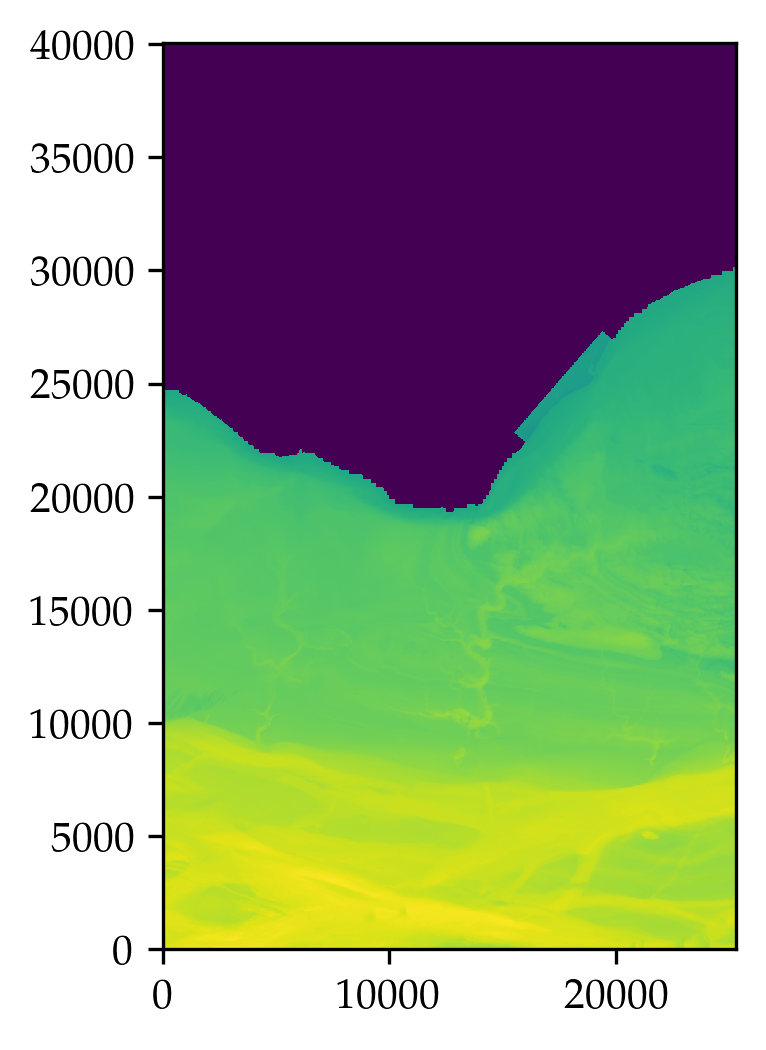

In [23]:
A = np.asarray(pd.read_csv(r'C:\Users\ianmu\OneDrive - Imperial College London\Thesis\SWAN\Input\Eastbourne_01\Eastbourne_01_old.bot',header=None,sep=' '))
# plt.imshow(A, extent=[0,1295*19.5637065637, 0., 30.9111969112*1295])
A = A + 4.0698
SWASH_sbot = -ndimage.rotate(SWASH_bot2,49)
SWASH_sbot = ndimage.zoom(SWASH_sbot,[2/30.9111969112,2/19.5637065637])

mid_coor = (17000 + 19426.9350134975)/2, (21500 + 27340.375539317647)/2
mid_bot = len(A) - round((21500 + 27340.375539317647)/2/30.9111969112), round((17000 + 19426.9350134975)/2/19.5637065637)

SWAN_sbot = A[int(mid_bot[0]-(len(SWASH_sbot)/2)):int(mid_bot[0]+(len(SWASH_sbot)/2)), int(mid_bot[1]-(len(SWASH_sbot[0])/2)):int(mid_bot[1]+(len(SWASH_sbot[0])/2))]

for i in range(len(SWASH_sbot)):
    if (i<146):
        SWASH_sbot[i,:200-int(1.37*i)] = np.nan
    else:
        SWASH_sbot[i,:int(1.83*(i-145))] = np.nan
    if (i<46):
        SWASH_sbot[i,200+int(1.83*i):] = np.nan
    if (i>42):
        SWASH_sbot[i,-int(1.37*(i-44))-5:] = np.nan

SWASH_sbot[np.isnan(SWASH_sbot)] = SWAN_sbot[np.isnan(SWASH_sbot)]

A[int(mid_bot[0]-(len(SWASH_sbot)/2)):int(mid_bot[0]+(len(SWASH_sbot)/2)), int(mid_bot[1]-(len(SWASH_sbot[0])/2)):int(mid_bot[1]+(len(SWASH_sbot[0])/2))] = SWASH_sbot
A[A<-50] = -99

plt.imshow(A, extent=[0,1295*19.5637065637, 0., 30.9111969112*1295])

In [25]:
np.savetxt(r'C:\Users\ianmu\OneDrive - Imperial College London\Thesis\SWAN\Input\Eastbourne_01\Eastbourne_01.bot',A)

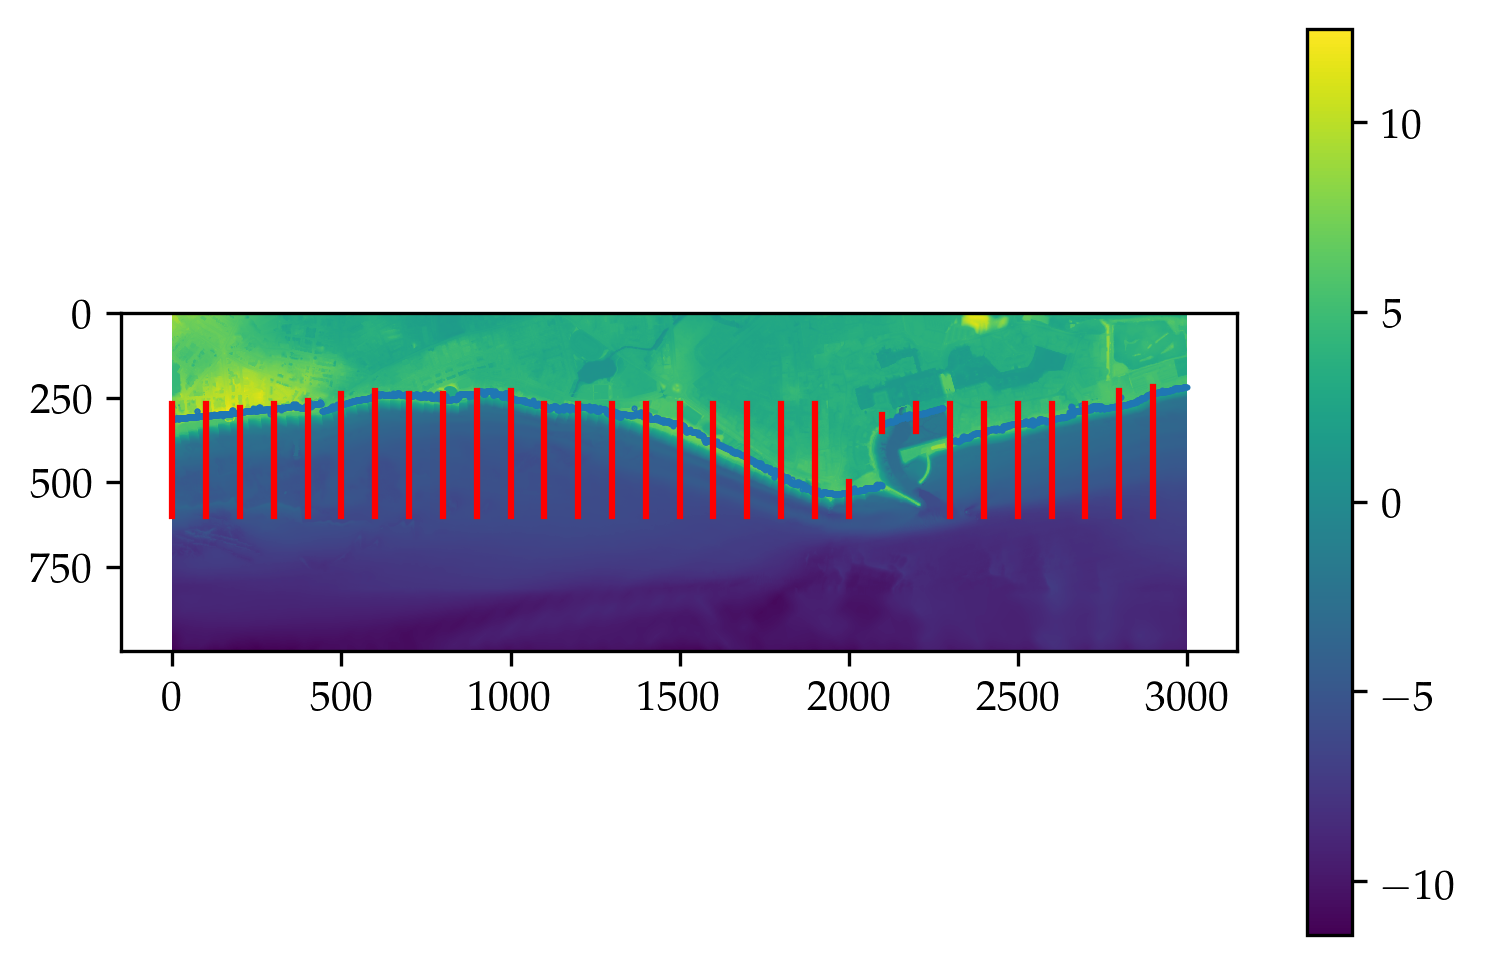

In [26]:
A = []

marges = [270, 600],[270, 600],[280, 600],[270, 600],[260, 600],[240, 600],[230, 600],[240, 600],[240, 600],[230, 600],\
         [230, 600],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],\
         [500, 600],[300, 350],[270, 350],[270, 600],[270, 600],[270, 600],[270, 600],[270, 600],[230, 600],[220, 600]
for j in range(30):
    plt.plot([j*100,j*100],marges[j],'r')
    for i in range(100):
#         plt.plot(SWASH_bot2[marges[j][0]:marges[j][1],i+100*j])
        A.append(np.argmax(SWASH_bot2[marges[j][0]:marges[j][1],i+100*j])+marges[j][0]-1)
plt.imshow(SWASH_bot2)
plt.colorbar()

# x = np.concatenate((np.arange(0,3000)[:2090],np.arange(0,3000)[2310:]))
# y = np.concatenate((A[:2090], A[2310:]))

x_top = np.concatenate((np.arange(0,3000)[:2280],np.arange(0,3000)[2310:]))
y_top = np.concatenate((A[:2280], A[2310:]))

plt.scatter(x_top,y_top,s=.2)

y_left = np.arange(332,508)
x_left = np.zeros(len(y_left))
for i in y_left:
    x_left[i-332] = np.argmax(SWASH_bot2[:,2000:2100][i]) + 2000
# plt.plot(x_left,y_left,'r.')

y_right = np.arange(280,378)
x_right = np.zeros(len(y_right))
for i in y_right:
    x_right[i-280] = np.argmax(SWASH_bot2[:,2240:2320][i]) + 2240
# plt.plot(x_right,y_right,'g.')

x_y_top = np.zeros([len(x_top),2])
x_y_top[:,0] = x_top*2
x_y_top[:,1] = 2000 - y_top*2

x_y_left = np.zeros([len(x_left),2])
x_y_left[:,0] = x_left*2
x_y_left[:,1] = 2000 - y_left*2

x_y_right = np.zeros([len(x_right),2])
x_y_right[:,0] = x_right*2
x_y_right[:,1] = 2000 - y_right*2

In [27]:
x0, y0 = 17000, 21500

x_y_top_glob = np.zeros([len(x_y_top),2])
theta = np.arctan(x_y_top[:,1]/x_y_top[:,0])+49/180*np.pi
mod = (x_y_top[:,0]**2 + x_y_top[:,1]**2)**.5
x_y_top_glob[:,0] = x0 + mod * np.cos(theta)
x_y_top_glob[:,1] = y0 + mod * np.sin(theta)
np.savetxt(r'C:\Users\ianmu\OneDrive - Imperial College London\TU Delft cluster sync\SWASH_2DH_1\Input\Eastbourne_01_T.locs',x_y_top_glob)

x_y_right_glob = np.zeros([len(x_y_right),2])
theta = np.arctan(x_y_right[:,1]/x_y_right[:,0])+49/180*np.pi
mod = (x_y_right[:,0]**2 + x_y_right[:,1]**2)**.5
x_y_right_glob[:,0] = x0 + mod * np.cos(theta)
x_y_right_glob[:,1] = y0 + mod * np.sin(theta)
np.savetxt(r'C:\Users\ianmu\OneDrive - Imperial College London\TU Delft cluster sync\SWASH_2DH_1\Input\Eastbourne_01_L.locs',x_y_right_glob)

x_y_left_glob = np.zeros([len(x_y_left),2])
theta = np.arctan(x_y_left[:,1]/x_y_left[:,0])+49/180*np.pi
mod = (x_y_left[:,0]**2 + x_y_left[:,1]**2)**.5
x_y_left_glob[:,0] = x0 + mod * np.cos(theta)
x_y_left_glob[:,1] = y0 + mod * np.sin(theta)
np.savetxt(r'C:\Users\ianmu\OneDrive - Imperial College London\TU Delft cluster sync\SWASH_2DH_1\Input\Eastbourne_01_R.locs',x_y_left_glob)

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


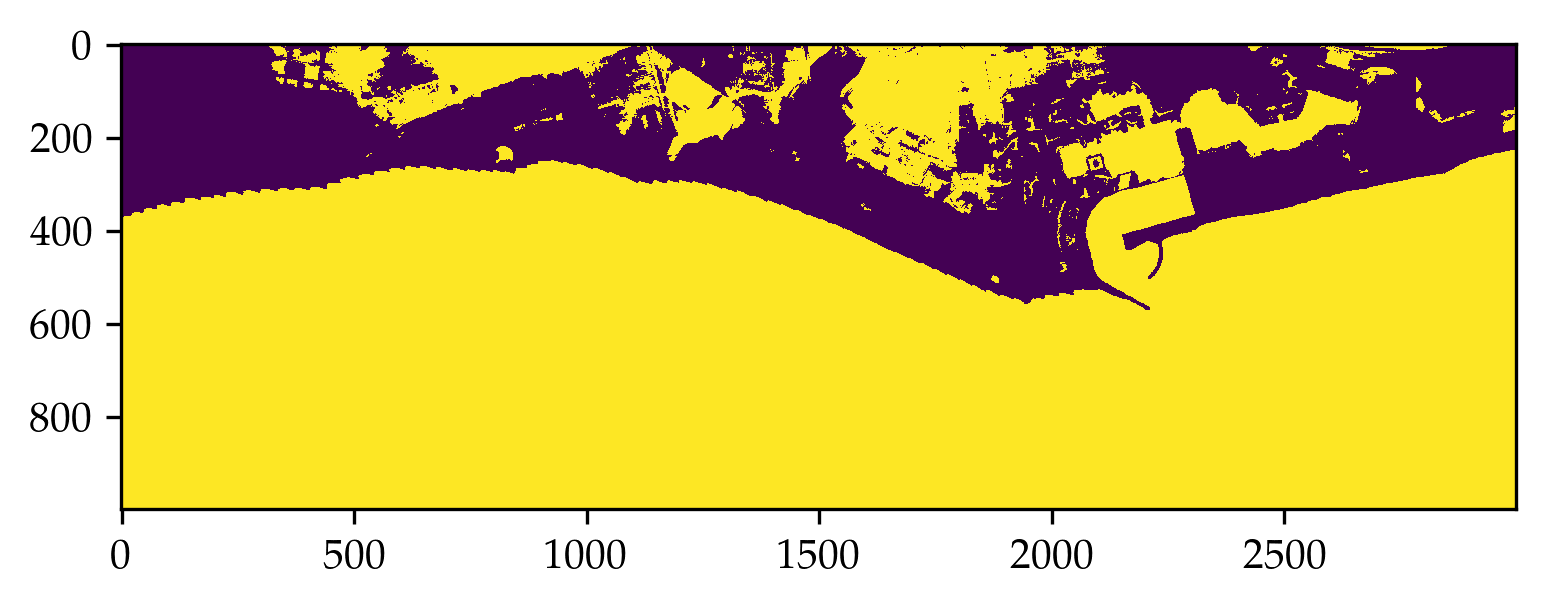

In [28]:
plt.imshow(SWASH_bot2<3.2178534)

In [16]:
# Delete less significant bathymetry

# behind_def = np.zeros([1000,3000])
# for i in range(len(A)):
#     behind_def[:A[i]-50,i] = np.ones(A[i]-50)
    
# # plt.imshow((behind_def*SWASH_bot2)[280:570,2060:2320]>1)
# # plt.imshow(behind_def[(behind_def*SWASH_bot2)[280:570,2060:2320]>1])
# # plt.colorbar()

# # C = (behind_def*SWASH_bot2)[280:570,2060:2320]
# # C[0:37,50:89] = 10
# # C[0:36,50:92] = 10
# # C[0:35,50:96] = 10
# # C[0:34,50:99] = 10
# # C[0:33,50:103] = 10
# # C[0:32,50:106] = 10
# # C[0:31,50:130] = 10

# behind_def[260:570,2040:2340] = 0
# SWASH_bot2[behind_def!=0] = 3.2178534
# plt.imshow(SWASH_bot2)
# plt.colorbar()

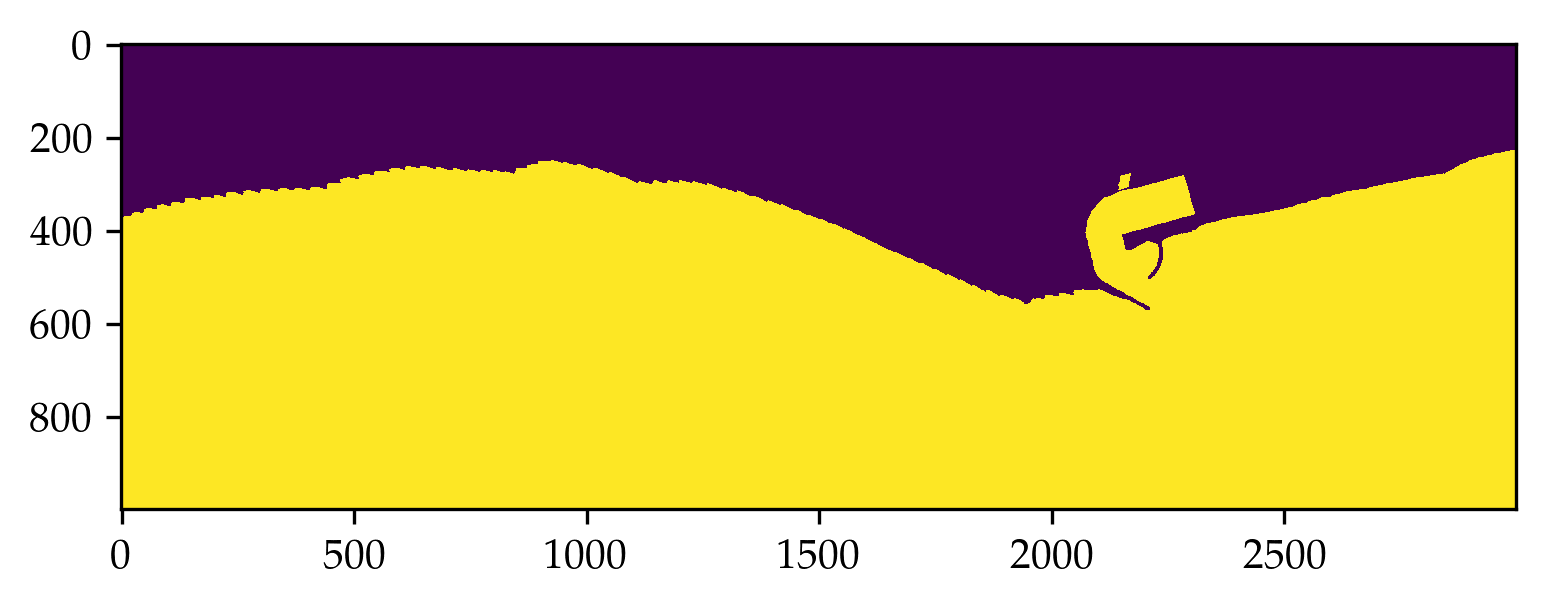

In [25]:
# make wlev
surge = [0.9704831,0.2589876,0.8824146,0.4273808,0.7643247,0.5707395,0.6355168]

# for i in range(len(surge)):
i = 0
surge_tide = 2.247370297 + surge[i]
wlev = np.ones([len(SWASH_bot2),len(SWASH_bot2[0])])*-99
wlev[SWASH_bot2<surge_tide] = surge_tide
wlev[:260,1000:2000] = -99
wlev[:200,:1500] = -99
wlev[450:520,1850:2000] = -99
wlev[200:260,800:860] = -99
wlev[200:500,2000:2074] = -99
wlev[200:310,2000:2145] = -99
wlev[200:320,2000:2140] = -99
wlev[200:340,2000:2100] = -99
wlev[200:300,2175:2220] = -99
wlev[200:297,2200:2231] = -99
wlev[200:293,2200:2245] = -99
wlev[200:289,2200:2260] = -99
wlev[200:287,2200:2267] = -99
wlev[200:284,2200:2278] = -99
wlev[200:282,2200:2300] = -99
wlev[200:390,1560:2050] = -99
wlev[:220,1850:] = -99
wlev[200:282,2300:2700] = -99
wlev[200:277,2100:2200] = -99
wlev[270:279,2100:2163] = -99
wlev[270:281,2100:2155] = -99
wlev[200:250,400:550] = -99
wlev[150:250,500:700] = -99

plt.imshow(wlev)
np.savetxt("C:/Users/ianmu/OneDrive - Imperial College London/TU Delft cluster sync/SWASH_2DH_1/Input/Eastbourne_01.wlv",wlev)

In [26]:
np.savetxt("C:/Users/ianmu/OneDrive - Imperial College London/TU Delft cluster sync/SWASH_2DH_1/Input/Eastbourne_01.bot",-SWASH_bot2)

1.844079659222319

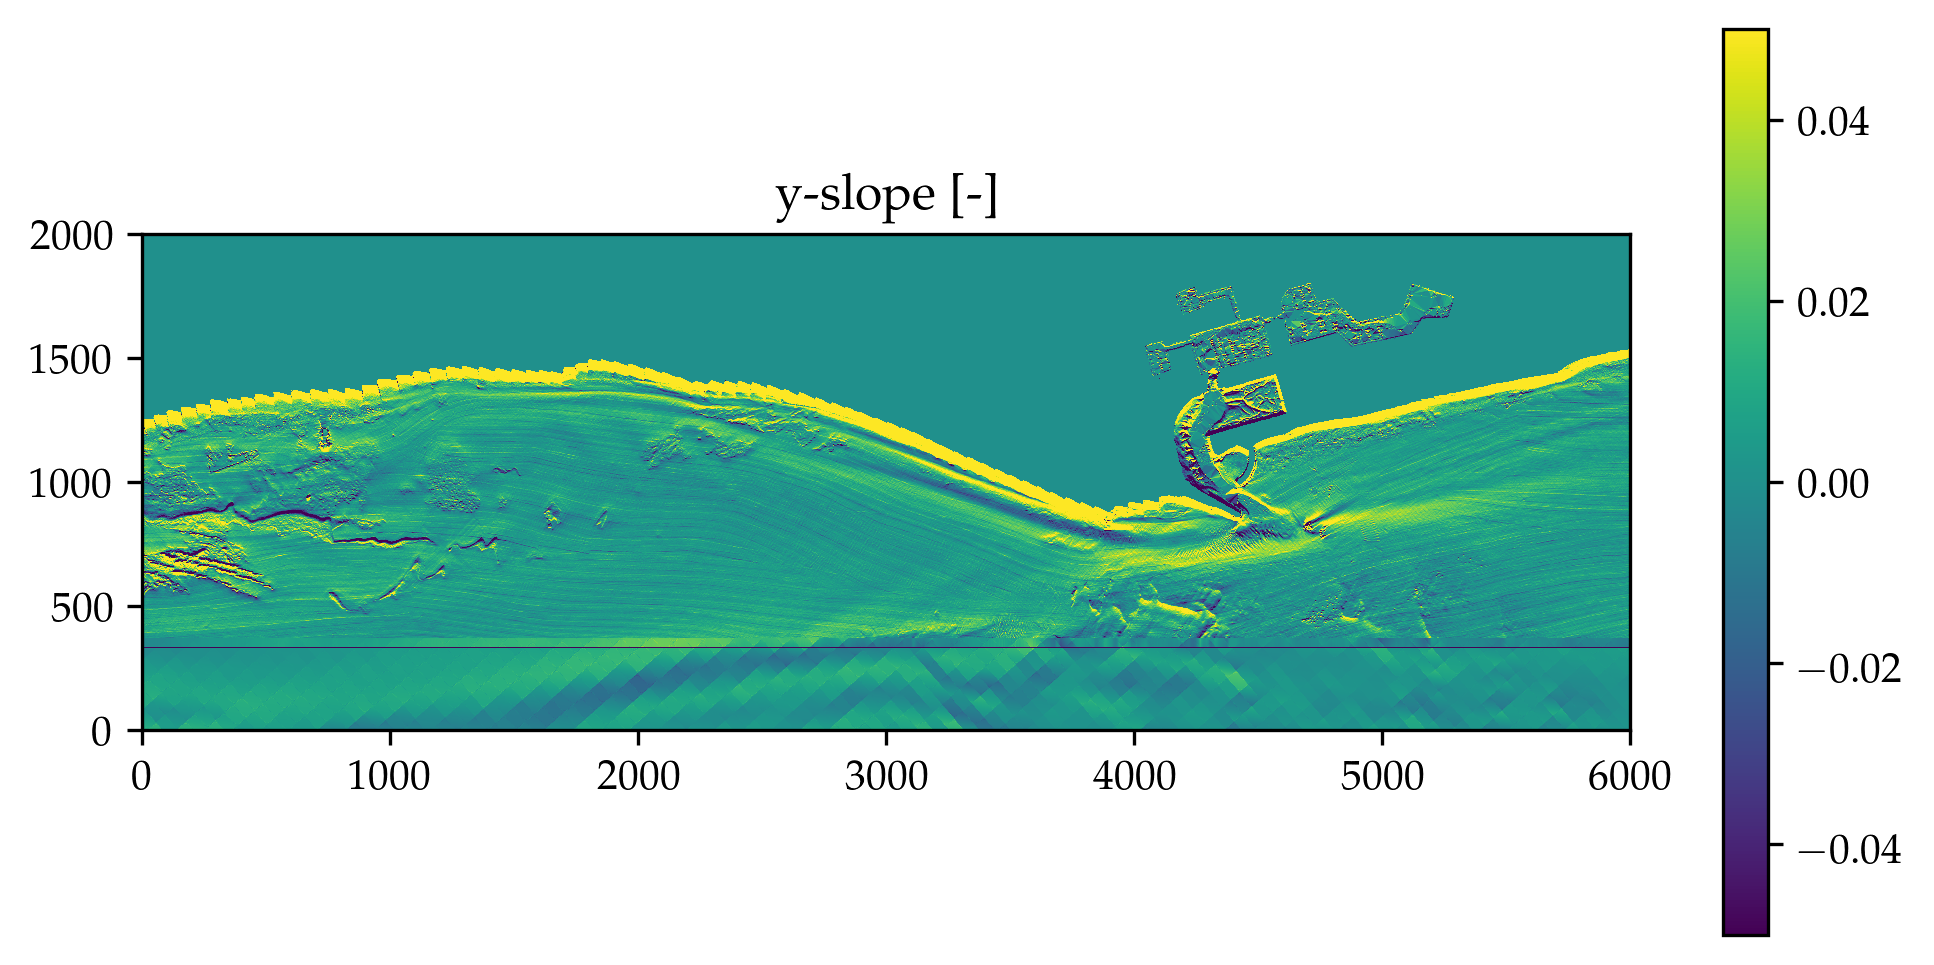

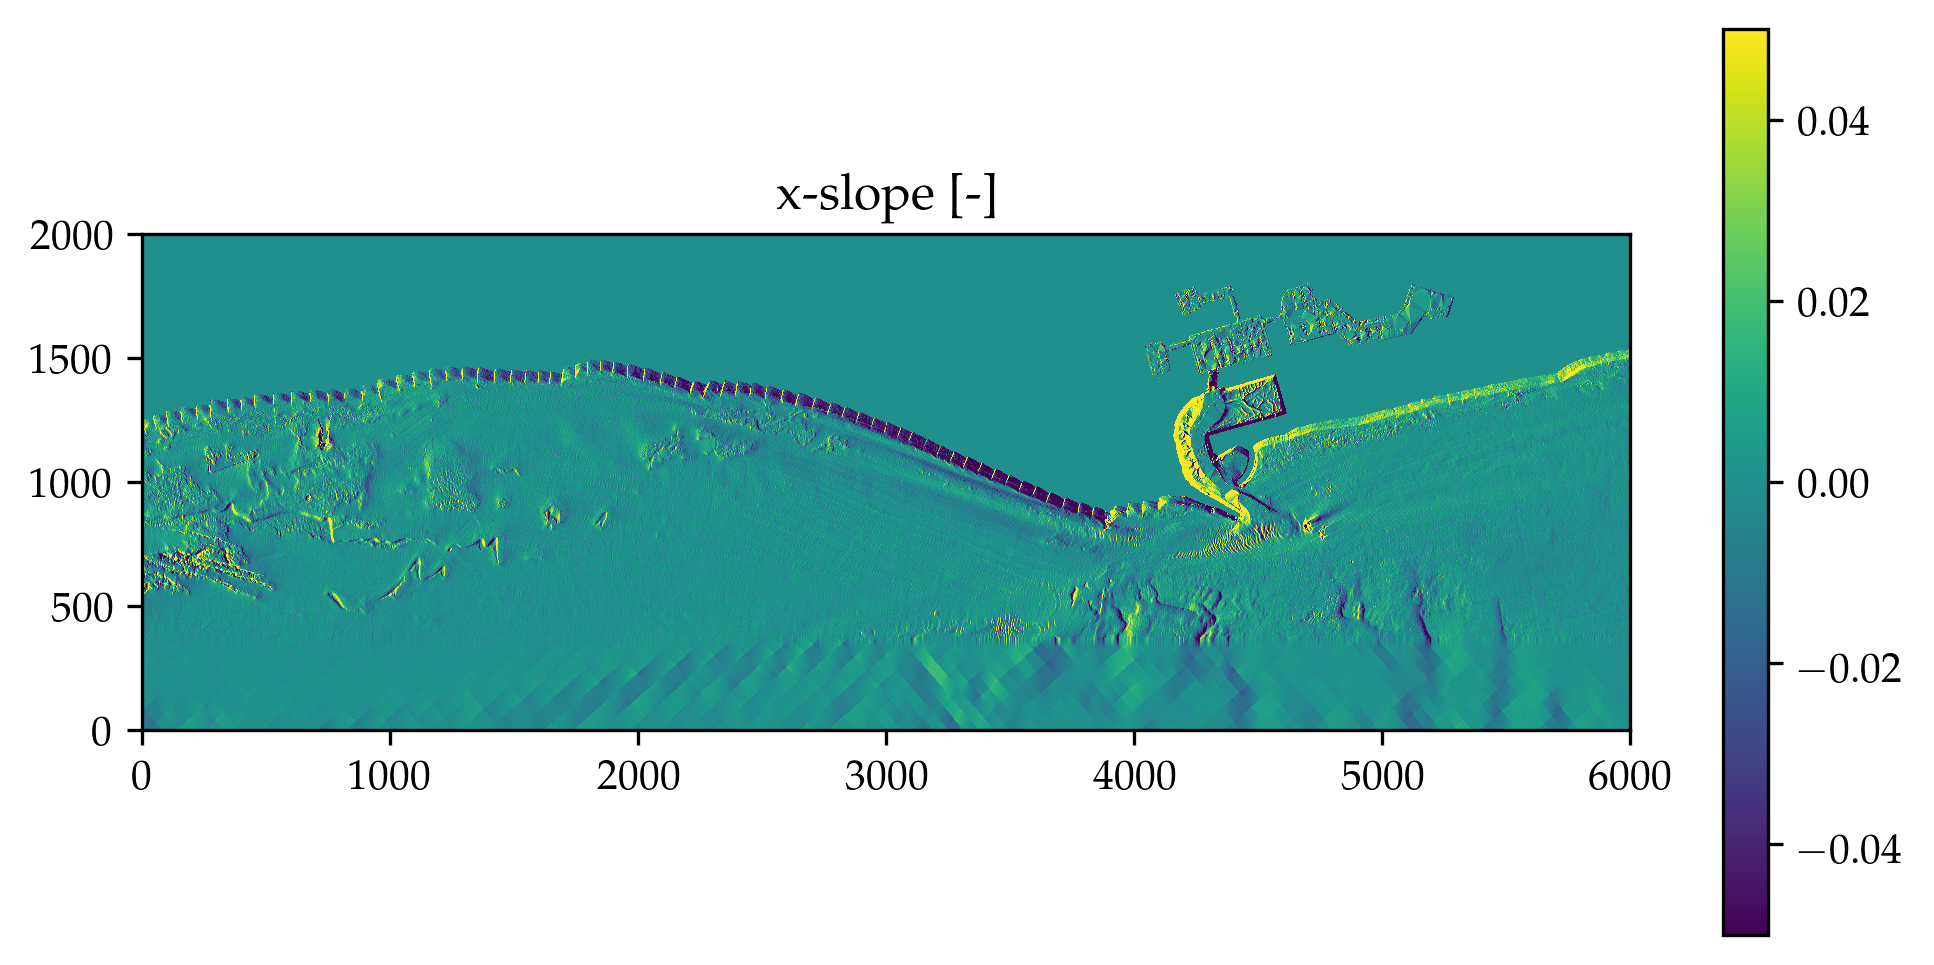

In [19]:
slope = np.zeros([len(SWASH_bot2),len(SWASH_bot2[0])])
wet = np.zeros([len(SWASH_bot2),len(SWASH_bot2[0])])

for i in range(len(SWASH_bot2)-1):
    slope[i] = (SWASH_bot2[i] - SWASH_bot2[i+1])/2
    wet[i] = wlev[i] + wlev[i+1]
wet = wet>0

plt.figure(figsize=[8,4])
plt.title("y-slope [-]")
plt.imshow(slope*wet,vmin=-.05, vmax=.05,extent = (0,6000,0,2000))
plt.colorbar()

total_div_1 = np.sum(np.abs(slope*wet))

wet = np.zeros([len(SWASH_bot2),len(SWASH_bot2[0])])
for i in range(len(SWASH_bot2[0])-1):
    slope[:,i] = (SWASH_bot2[:,i] - SWASH_bot2[:,i+1])/2
    wet[:,i] = wlev[:,i] + wlev[:,i+1]
wet = wet>0

plt.figure(figsize=[8,4])
plt.title("x-slope [-]")
plt.imshow(slope*wet,vmin=-.05, vmax=.05,extent = (0,6000,0,2000))
plt.colorbar()

total_div_2 = np.sum(np.abs(slope*wet))

total_div_1/total_div_2

In [66]:
wet

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False]])